In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.pyplot import imread

In [2]:
nomes_imgs = os.listdir('images')
images = {idx: imread(f'images\\{nomes_imgs[idx]}') for idx in range(len(nomes_imgs))}

In [3]:
def get_folder_size(folder):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size

In [4]:
size_bites = get_folder_size('images')
res_images = f'{images[0].shape[0]} linhas e {images[0].shape[1]} colunas'

In [5]:
def get_infos(nome_image):
    divisao = nome_image.split(').jpg')[0].split(')_')
    classes = divisao[0].split('(')[1].split(',')
    objetos = divisao[1].split('(')[1].split(',')
    fundo = divisao[2].split('(')[1]
    casa = divisao[3].split('(')[1]
    dia = divisao[4].split('(')[1]
    return [classes, objetos, fundo, casa, dia]

def get_rows(nome_image, idx_image):
    rows = []
    classes, objetos, fundo, casa, dia = get_infos(nome_image)
    for i,item in enumerate(classes):
        rows.append([idx_image, item, item+objetos[i], fundo, casa, dia])
    return rows


In [6]:
colunas = ['Idx Foto','Classe','Objeto','Fundo','Casa','Dia']
rows = []
for idx, image in enumerate(nomes_imgs):
    rows.extend(get_rows(image, idx))

df_images = pd.DataFrame(rows, columns=colunas)


In [7]:
df_images['Iluminação'] = df_images['Casa'].map({'True':'Casa ','False':'Fora '}) + df_images['Dia'].map({'True':'Dia','False':'Noite'})
df_images['Fundo_Iluminação'] = df_images['Fundo'] + ' '+ df_images['Iluminação']
df_images['Objeto_Fundo_Iluminação'] = df_images['Objeto'] + ' '+df_images['Fundo'] + ' '+ df_images['Iluminação']

In [8]:
df_images # Essa tabela será a base, pela qual construiremos as outras

Idx Foto       Classe        Objeto    Fundo   Casa    Dia  Iluminação   
0           0      Caderno      Caderno1     Cama   True   True    Casa Dia  \
1           0       Caneta       Caneta1     Cama   True   True    Casa Dia   
2           0       Quadro       Quadro1     Cama   True   True    Casa Dia   
3           0       Camera       Camera1     Cama   True   True    Casa Dia   
4           1      Caderno      Caderno1  Varanda  False   True    Fora Dia   
..        ...          ...           ...      ...    ...    ...         ...   
139        30       Camera       Camera1  Varanda  False  False  Fora Noite   
140        31        Livro        Livro2  Bancada  False   True    Fora Dia   
141        31         Fone         Fone1  Bancada  False   True    Fora Dia   
142        31       Quadro       Quadro2  Bancada  False   True    Fora Dia   
143        31  Desodorante  Desodorante1  Bancada  False   True    Fora Dia   

       Fundo_Iluminação        Objeto_Fundo_Iluminação  
0         Cama Casa Dia         Caderno1 Cama Casa Dia  
1         Cama Casa Dia          Caneta1 Cama Casa Dia  
2         Cama Casa Dia          Quadro1 Cama Casa Dia  
3         Cama Casa Dia          Camera1 Cama Casa Dia  
4      Varanda Fora Dia      Caderno1 Varanda Fora Dia  
..                  ...                            ...  
139  Varanda Fora Noite     Camera1 Varanda Fora Noite  
140    Bancada Fora Dia        Livro2 Bancada Fora Dia  
141    Bancada Fora Dia         Fone1 Bancada Fora Dia  
142    Bancada Fora Dia       Quadro2 Bancada Fora Dia  
143    Bancada Fora Dia  Desodorante1 Bancada Fora Dia  

[144 rows x 9 columns]

Idx Foto       Classe        Objeto Fundo  Casa    Dia  Iluminação   
66        15        Livro        Livro1  Mesa  True  False  Casa Noite  \
67        15       Caneta       Caneta1  Mesa  True  False  Casa Noite   
68        15      Caderno      Caderno1  Mesa  True  False  Casa Noite   
69        15       Quadro       Quadro2  Mesa  True  False  Casa Noite   
70        15  Desodorante  Desodorante1  Mesa  True  False  Casa Noite   
71        15         Copo         Copo1  Mesa  True  False  Casa Noite   

   Fundo_Iluminação       Objeto_Fundo_Iluminação  
66  Mesa Casa Noite        Livro1 Mesa Casa Noite  
67  Mesa Casa Noite       Caneta1 Mesa Casa Noite  
68  Mesa Casa Noite      Caderno1 Mesa Casa Noite  
69  Mesa Casa Noite       Quadro2 Mesa Casa Noite  
70  Mesa Casa Noite  Desodorante1 Mesa Casa Noite  
71  Mesa Casa Noite         Copo1 Mesa Casa Noite

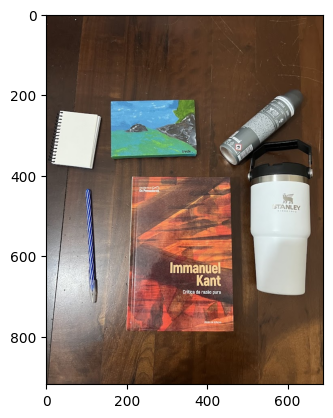

In [9]:
###### EXEMPLO de imagem, e como ela aparece na tabela total
plt.imshow(images[15])
df_images[df_images['Idx Foto']==15]

In [10]:
### repeticoes (Objeto, Fundo, Iluminação)
df_images.groupby('Objeto_Fundo_Iluminação').count()['Idx Foto']

Objeto_Fundo_Iluminação
Caderno1 Bancada Fora Noite        3
Caderno1 Cama Casa Dia             3
Caderno1 Mesa Casa Noite           3
Caderno1 Varanda Fora Dia          3
Camera1 Cama Casa Dia              3
Camera1 Mesa Casa Noite            3
Camera1 Varanda Fora Dia           3
Camera1 Varanda Fora Noite         3
Caneta1 Bancada Fora Noite         3
Caneta1 Cama Casa Dia              3
Caneta1 Mesa Casa Noite            3
Caneta1 Varanda Fora Dia           3
Celular1 Bancada Fora Dia          3
Celular1 Cama Casa Dia             3
Celular1 Mesa Casa Noite           3
Celular1 Varanda Fora Noite        3
Copo1 Bancada Fora Dia             3
Copo1 Bancada Fora Noite           3
Copo1 Cama Casa Dia                3
Copo1 Mesa Casa Noite              3
Desodorante1 Bancada Fora Dia      3
Desodorante1 Bancada Fora Noite    3
Desodorante1 Cama Casa Dia         3
Desodorante1 Mesa Casa Noite       3
Fone1 Bancada Fora Dia             3
Fone1 Cama Casa Dia                3
Fone1 Mesa Cas

In [11]:
tabela_sumaria = pd.Series({
    'Nome das classes':str(df_images['Classe'].unique())[1:-1].replace('\n',''),
    'Número de classes':len(df_images['Classe'].unique()),
    'Numero de imagens':len(nomes_imgs),
    'Tamanho da base (bytes)':size_bites,
    'Resolução das imagens': res_images
})
tabela_sumaria

Nome das classes           'Caderno' 'Caneta' 'Quadro' 'Camera' 'Pulseira...
Número de classes                                                         10
Numero de imagens                                                         32
Tamanho da base (bytes)                                              6077399
Resolução das imagens                               919 linhas e 689 colunas
dtype: object

In [12]:
def get_class_detais(df_images):
    classes = df_images['Classe'].unique()
    df_rows = []
    for classe in classes:
        df_classe = df_images[df_images['Classe']==classe]
        row = [
            classe,
            len(df_classe['Objeto'].unique()),
            len(df_classe['Fundo'].unique()),
            str(df_classe['Fundo'].unique())[1:-1].replace('\n',''),
            len(df_classe['Iluminação'].unique()),
            str(df_classe['Iluminação'].unique())[1:-1].replace('\n',''),
            df_classe.groupby('Objeto_Fundo_Iluminação').count()['Idx Foto'].min(), # minimo de repeticoes | pois todos devem ter ao menos 3 repeticoes (e nessa base, todos tem 3 de fato, como já mostrado acima)
            len(df_classe)
        ]
        df_rows.append(row)
    return pd.DataFrame(df_rows, columns=['Classe','Num_Objetos','Num_Fundos','Fundos','Num_Iluminações','Iluminações','Repetições','Total de amostras'])

def get_obj_detais(df_images):
    classes = df_images['Objeto'].unique()
    df_rows = []
    for classe in classes:
        df_classe = df_images[df_images['Objeto']==classe]
        row = [
            classe,
            len(df_classe['Fundo'].unique()),
            str(df_classe['Fundo'].unique())[1:-1].replace('\n',''),
            len(df_classe['Iluminação'].unique()),
            str(df_classe['Iluminação'].unique())[1:-1].replace('\n',''),
            df_classe.groupby('Objeto_Fundo_Iluminação').count()['Idx Foto'].min(), # minimo de repeticoes | pois todos devem ter ao menos 3 repeticoes (e nessa base, todos tem 3 de fato, como já mostrado acima)
            len(df_classe)
        ]
        df_rows.append(row)
    return pd.DataFrame(df_rows, columns=['Objeto','Num_Fundos','Fundos','Num_Iluminações','Iluminações','Repetições','Total de amostras'])

        

In [13]:
tabela_por_classe = get_class_detais(df_images)
tabela_por_classe

Classe  Num_Objetos  Num_Fundos                             Fundos   
0      Caderno            1           4  'Cama' 'Varanda' 'Bancada' 'Mesa'  \
1       Caneta            1           4  'Cama' 'Varanda' 'Bancada' 'Mesa'   
2       Quadro            2           4  'Cama' 'Varanda' 'Mesa' 'Bancada'   
3       Camera            1           3            'Cama' 'Mesa' 'Varanda'   
4     Pulseira            1           3            'Varanda' 'Cama' 'Mesa'   
5  Desodorante            1           3            'Bancada' 'Cama' 'Mesa'   
6         Copo            1           3            'Bancada' 'Mesa' 'Cama'   
7         Fone            1           4  'Bancada' 'Mesa' 'Cama' 'Varanda'   
8      Celular            1           4  'Bancada' 'Mesa' 'Cama' 'Varanda'   
9        Livro            2           4  'Cama' 'Varanda' 'Bancada' 'Mesa'   

   Num_Iluminações                                      Iluminações   
0                4  'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite'  \
1                4  'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite'   
2                4  'Casa Dia' 'Fora Dia' 'Casa Noite' 'Fora Noite'   
3                4  'Casa Dia' 'Casa Noite' 'Fora Dia' 'Fora Noite'   
4                4  'Fora Dia' 'Fora Noite' 'Casa Dia' 'Casa Noite'   
5                4  'Fora Noite' 'Fora Dia' 'Casa Dia' 'Casa Noite'   
6                4  'Fora Noite' 'Casa Noite' 'Fora Dia' 'Casa Dia'   
7                4  'Fora Dia' 'Casa Noite' 'Casa Dia' 'Fora Noite'   
8                4  'Fora Dia' 'Casa Noite' 'Casa Dia' 'Fora Noite'   
9                4  'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite'   

   Repetições  Total de amostras  
0           3                 12  
1           3                 12  
2           3                 24  
3           3                 12  
4           3                 12  
5           3                 12  
6           3                 12  
7           3                 12  
8           3                 12  
9           3                 24

In [14]:
tabela_por_obj = get_obj_detais(df_images)
tabela_por_obj

Objeto  Num_Fundos                             Fundos   
0       Caderno1           4  'Cama' 'Varanda' 'Bancada' 'Mesa'  \
1        Caneta1           4  'Cama' 'Varanda' 'Bancada' 'Mesa'   
2        Quadro1           3            'Cama' 'Varanda' 'Mesa'   
3        Camera1           3            'Cama' 'Mesa' 'Varanda'   
4      Pulseira1           3            'Varanda' 'Cama' 'Mesa'   
5   Desodorante1           3            'Bancada' 'Cama' 'Mesa'   
6          Copo1           3            'Bancada' 'Mesa' 'Cama'   
7        Quadro2           3            'Mesa' 'Cama' 'Bancada'   
8          Fone1           4  'Bancada' 'Mesa' 'Cama' 'Varanda'   
9       Celular1           4  'Bancada' 'Mesa' 'Cama' 'Varanda'   
10        Livro1           4  'Cama' 'Varanda' 'Bancada' 'Mesa'   
11        Livro2           4  'Varanda' 'Bancada' 'Cama' 'Mesa'   

    Num_Iluminações                                      Iluminações   
0                 4  'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite'  \
1                 4  'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite'   
2                 4  'Casa Dia' 'Fora Dia' 'Casa Noite' 'Fora Noite'   
3                 4  'Casa Dia' 'Casa Noite' 'Fora Dia' 'Fora Noite'   
4                 4  'Fora Dia' 'Fora Noite' 'Casa Dia' 'Casa Noite'   
5                 4  'Fora Noite' 'Fora Dia' 'Casa Dia' 'Casa Noite'   
6                 4  'Fora Noite' 'Casa Noite' 'Fora Dia' 'Casa Dia'   
7                 4  'Casa Noite' 'Casa Dia' 'Fora Noite' 'Fora Dia'   
8                 4  'Fora Dia' 'Casa Noite' 'Casa Dia' 'Fora Noite'   
9                 4  'Fora Dia' 'Casa Noite' 'Casa Dia' 'Fora Noite'   
10                4  'Casa Dia' 'Fora Dia' 'Fora Noite' 'Casa Noite'   
11                4  'Fora Noite' 'Fora Dia' 'Casa Dia' 'Casa Noite'   

    Repetições  Total de amostras  
0            3                 12  
1            3                 12  
2            3                 12  
3            3                 12  
4            3                 12  
5            3                 12  
6            3                 12  
7            3                 12  
8            3                 12  
9            3                 12  
10           3                 12  
11           3                 12

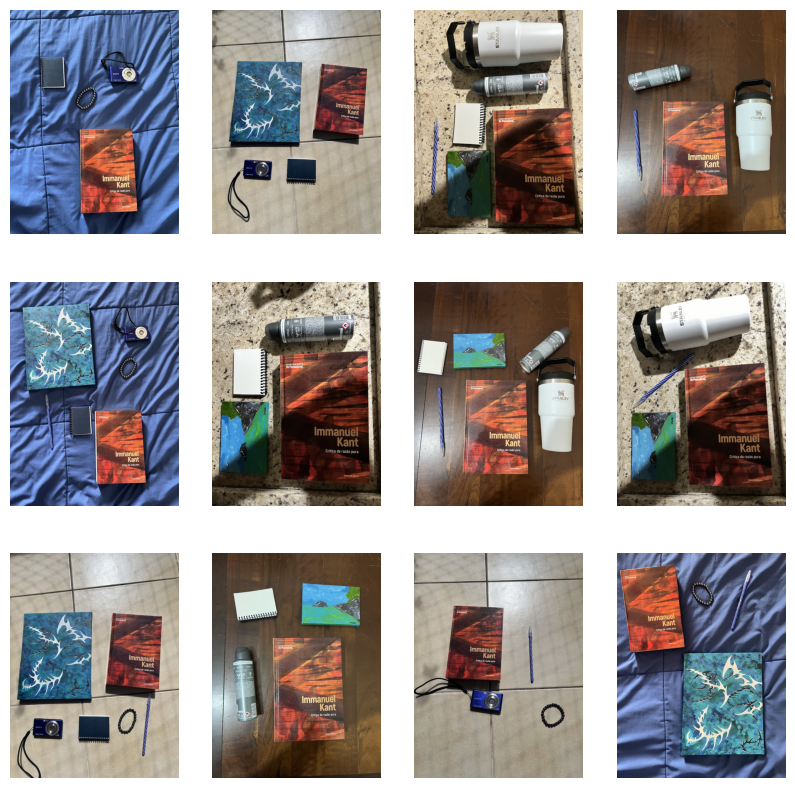

In [15]:
# todas fotos com determinado objeto
fig, ax = plt.subplots(3,4, figsize=(10,10))
for k, foto_idx in enumerate(df_images[df_images['Objeto']=='Livro1']['Idx Foto'].values):
    idx_col = k % 3
    idx_row = k // 3 
    ax[idx_col,idx_row].imshow(images[foto_idx])
    ax[idx_col, idx_row].axis('off') 
    ax[idx_col, idx_row].set_xticks([]) 
    ax[idx_col, idx_row].set_yticks([]) 

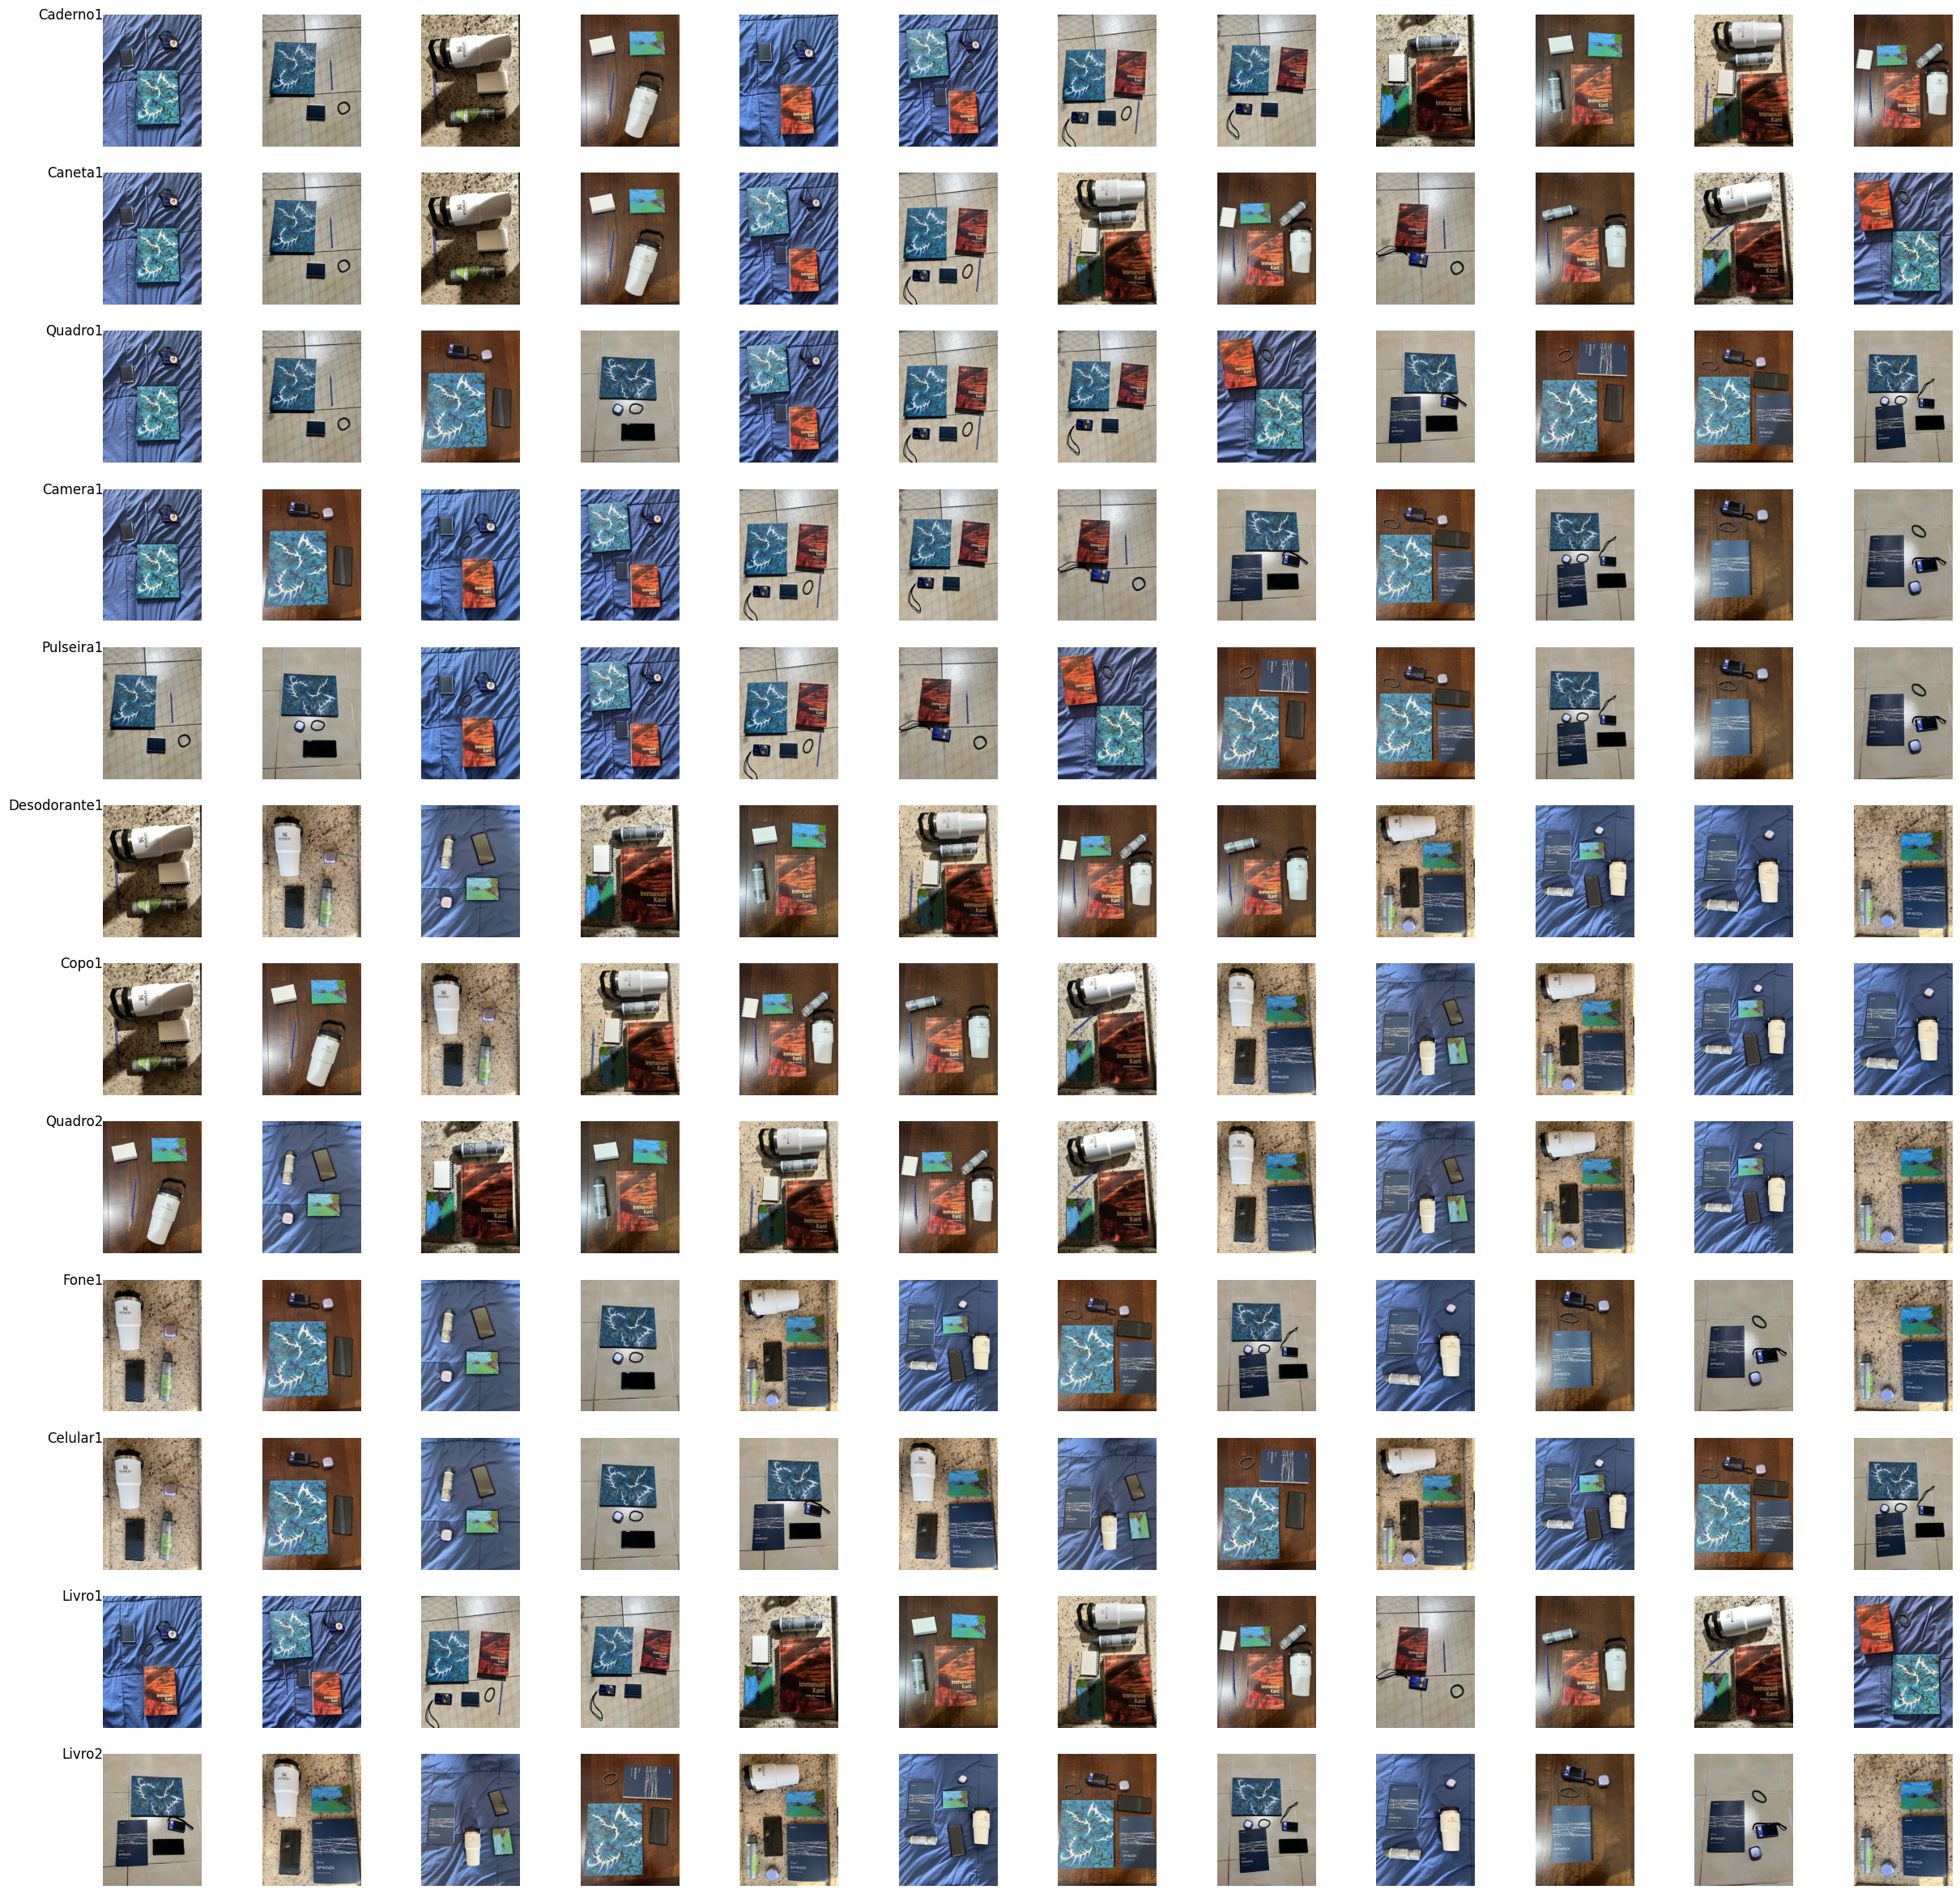

In [16]:
## para cada objeto, todas imagens com ele
num_rows = len(tabela_por_obj)
num_cols = tabela_por_obj['Total de amostras'].max()
fig, ax = plt.subplots(num_rows, num_cols, figsize=(2.5*num_rows,2.5*num_cols), sharey='all',sharex='all')
for i, objeto in enumerate(tabela_por_obj['Objeto']):
    ax[i,0].text(0, 0, objeto, va='center', ha='right', fontsize=12)
    for k, foto_idx in enumerate(df_images[df_images['Objeto']==objeto]['Idx Foto'].values):
        ax[i,k].imshow(images[foto_idx])
        ax[i,k].axis('off') 
        ax[i,k].set_xticks([]) 
        ax[i,k].set_yticks([]) 